<a href="https://colab.research.google.com/github/Dhimanhdg/Dhimanhdg/blob/main/Medical%20Insurance%20Cost%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv("/content/medical_insurance.csv")

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [29]:
y = df['charges']

In [30]:
x = df.drop('charges',axis = 1)

In [31]:
X_encoded = pd.get_dummies((x), drop_first=True)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)


In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
model = LinearRegression()


In [35]:
model.fit(X_train, y_train)


LinearRegression()

In [36]:
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_absolute_error, r2_score


In [38]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 4160.247974762991
R2 Score: 0.73981661775643


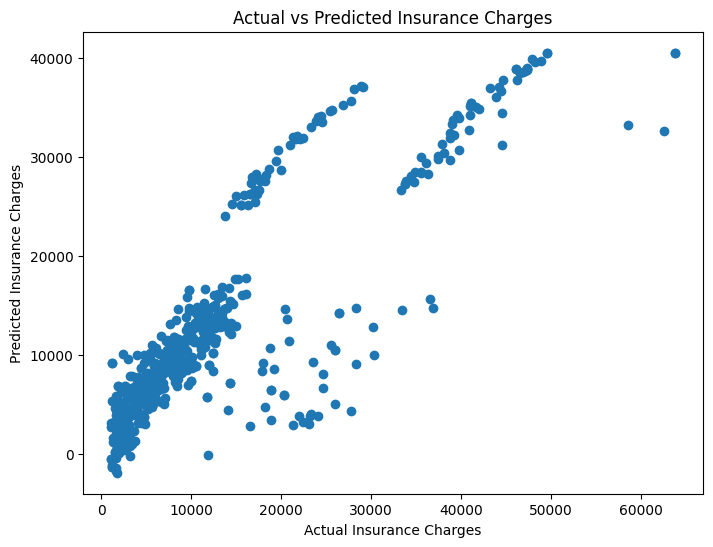

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()


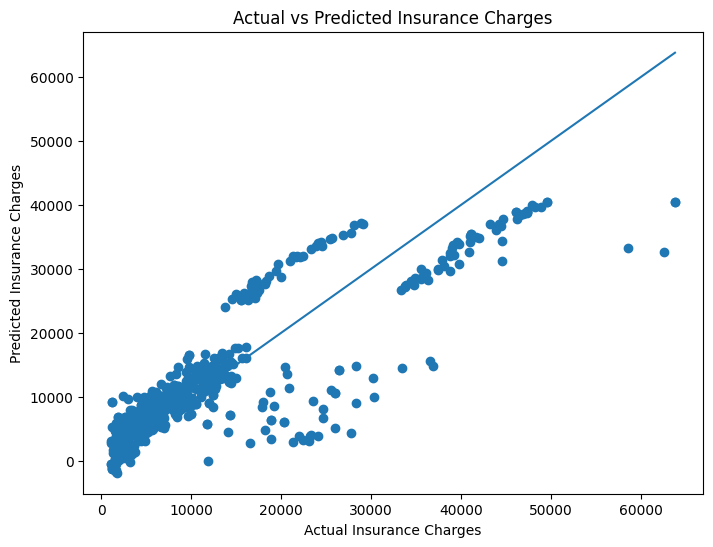

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()


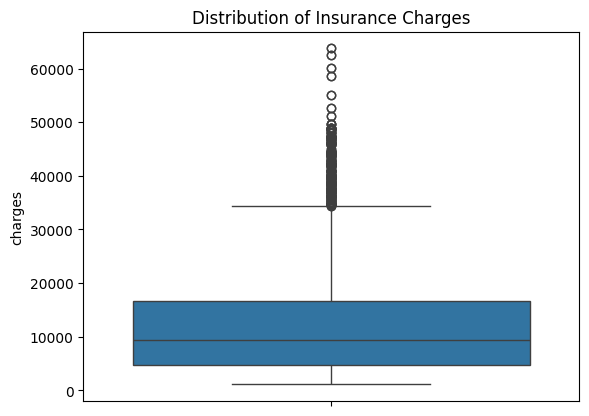

In [41]:
sns.boxplot(y=df['charges'])
plt.title("Distribution of Insurance Charges")
plt.show()
